In [2]:
# Update kaggle to be able to fully and correctly download the 5GB dataset
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 2.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=d207ba27511beced456c20147ef57c6eb2661670604476031b203dc442295a52
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [51]:
!pip install scikeras

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.10.1
    Uninstalling importlib-metadata-4.10.1:
      Successfully uninstalled importlib-metadata-4.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
markdown 3.3.6 requires importlib-metadata>=4.4; python_version < "3.10", but you have importlib-metadata 3.10.1 which is incompatible.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir data
!mkdir /root/.kaggle
!mv drive/MyDrive/deep_learning/kaggle.json /root/.kaggle/kaggle.json
!sudo chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c humpback-whale-identification -p data

100% 5.48G/5.51G [00:49<00:00, 102MB/s]
100% 5.51G/5.51G [00:49<00:00, 120MB/s]


In [6]:
!unzip data/humpback-whale-identification.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: train/cd2c4ae6b.jpg     
  inflating: train/cd310f07c.jpg     
  inflating: train/cd32697ae.jpg     
  inflating: train/cd346388a.jpg     
  inflating: train/cd36f1901.jpg     
  inflating: train/cd382b662.jpg     
  inflating: train/cd3937f27.jpg     
  inflating: train/cd3a073a2.jpg     
  inflating: train/cd3afe416.jpg     
  inflating: train/cd407fae0.jpg     
  inflating: train/cd437a15c.jpg     
  inflating: train/cd444321e.jpg     
  inflating: train/cd4740ee9.jpg     
  inflating: train/cd49e7801.jpg     
  inflating: train/cd4b8f33f.jpg     
  inflating: train/cd4fae084.jpg     
  inflating: train/cd520d861.jpg     
  inflating: train/cd52c565c.jpg     
  inflating: train/cd5577b32.jpg     
  inflating: train/cd5712905.jpg     
  inflating: train/cd598b557.jpg     
  inflating: train/cd59d5874.jpg     
  inflating: train/cd5a9c5b1.jpg     
  inflating: train/cd5b23ddc.jpg     
  inflatin

In [7]:
!rm -rf data/humpback-whale-identification.zip

In [8]:
!rm -rf data

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [2]:
NUMBER_SAMPLE = 20000

In [3]:
complete_train = pd.read_csv('train.csv')

sample_train = complete_train.head(NUMBER_SAMPLE)

In [4]:
# Reading the csv file for train dataset
train = sample_train

In [5]:
# The info() method prints information about the DataFrame.
# The information contains the number of columns, column labels, column data types,
# memory usage, range index, and the number of cells in each column (non-null values).
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   20000 non-null  object
 1   Id      20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


In [6]:
# The describe() method is used for calculating some statistical data like percentile,
# mean and std of the numerical values of the Series or DataFrame.
# It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.
train.describe()

,Image,Id
count,20000,20000
unique,20000,4526
top,0000e88ab.jpg,new_whale
freq,1,7631


In [7]:
# shape gives number of rows and columns in a tuple
train.shape

(20000, 2)

In [8]:
# head funtion gives the first 5 rows of datasets
train.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [9]:
# tail funtion gives the last 5 rows of datasets
train.tail()

,Image,Id
19995,c94aa3f69.jpg,w_f61b957
19996,c94e1d61a.jpg,w_d236b51
19997,c9592d899.jpg,w_8da30ad
19998,c95c55f0c.jpg,w_8936c44
19999,c95f2e4e8.jpg,w_e966f36


In [10]:
# put labels into y_train variable
y_train = train['Id']
# Drop the 'Id' column
X_train = train.drop(labels = ['Id'], axis = 1)
y_train.head()

0    w_f48451c
1    w_c3d896a
2    w_20df2c5
3    new_whale
4    new_whale
Name: Id, dtype: object

In [11]:
# Look for empty values
train.isnull().sum()

Image    0
Id       0
dtype: int64

In [12]:
# importing the libraries for image preprocessing
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

In [13]:
def prepare_images(data, line_count, path):
    
    X_images = np.zeros((line_count, 100, 100, 3))
    count = 0
    
    for fig in data['Image']:
        
        #load images into images of size 100x100x3
        img = image.load_img(path+'/'+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        X_images[count] = x
        if (count%500 == 0):
            print('Processing image: ', count+1, ", ", fig)
        count += 1
    
    return X_images

In [14]:
X_train = prepare_images(X_train, X_train.shape[0], 'train')

Processing image:  1 ,  0000e88ab.jpg
Processing image:  501 ,  04c72257b.jpg
Processing image:  1001 ,  09cacb84d.jpg
Processing image:  1501 ,  0ef961892.jpg
Processing image:  2001 ,  141b56a1a.jpg
Processing image:  2501 ,  199a417aa.jpg
Processing image:  3001 ,  1ec170983.jpg
Processing image:  3501 ,  23f084b93.jpg
Processing image:  4001 ,  29163ad0b.jpg
Processing image:  4501 ,  2e0fab120.jpg
Processing image:  5001 ,  3347515d9.jpg
Processing image:  5501 ,  3842d71dc.jpg
Processing image:  6001 ,  3d7f4c7d5.jpg
Processing image:  6501 ,  425f763ca.jpg
Processing image:  7001 ,  4714400cd.jpg
Processing image:  7501 ,  4c082fbdf.jpg
Processing image:  8001 ,  50c683e23.jpg
Processing image:  8501 ,  560d986ad.jpg
Processing image:  9001 ,  5b68c83ed.jpg
Processing image:  9501 ,  60410f111.jpg
Processing image:  10001 ,  654951f81.jpg
Processing image:  10501 ,  6a572256c.jpg
Processing image:  11001 ,  6f96f55b6.jpg
Processing image:  11501 ,  74da2b511.jpg
Processing image

In [15]:
X_train = X_train / 255.0 
# rescaling the dataset 
# dividing an image by 255 simply rescales the image from 0-255 to 0-1.
# (Converting it to float from int makes computation convenient too) 
print('X_train shape: ', X_train.shape)

X_train shape:  (20000, 100, 100, 3)


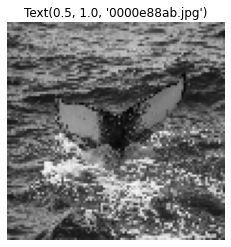

In [16]:
# Checking example input image
plt.imshow(X_train[0][:,:,0], cmap='gray')
plt.title(plt.title(train.iloc[0,0]))
plt.axis('off')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [18]:
#Fit label encoder and return encoded labels.
y_train = label_encoder.fit_transform(y_train)

In [19]:
# let's look at first 10 values
y_train[0:10]

array([4327, 3451,  606,    0,    0,    0, 3903,    0, 1745, 2933])

In [20]:
# finding shape of y_train data
y_train.shape

(20000,)

In [21]:
y_train_class_count = len(set(y_train))
y_train_class_count

4526

In [22]:
# convert to one-hot-encoding

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = y_train_class_count)

In [23]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential # to create a cnn model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [25]:
def get_model():

  model = Sequential()

  model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu', input_shape = (100,100,3)))
  model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2,2)))
  model.add(BatchNormalization())

  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
  model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
  model.add(BatchNormalization())

  # fully connected
  model.add(Flatten())
  model.add(Dense(256, activation = 'relu'))
  model.add(Dropout(rate=0.3))
  model.add(BatchNormalization())
  model.add(Dropout(rate=0.3))
  model.add(Dense(y_train.shape[1], activation = 'softmax'))
  return model

In [26]:
model = get_model()

In [27]:
#Provides the summary of model we created
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 32)        9

In [46]:
# Define the optimizer
optimizer = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)

In [47]:
# Set a learning rate scheduler
learning_rate_reduction = ReduceLROnPlateau(monitor='loss', 
                                            patience=1, 
                                            verbose=1, 
                                            factor=0.8, 
                                            min_lr=0.00001)

In [30]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [41]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images horizontally
        vertical_flip=False, # randomly flip images vertically
        validation_split=0.3)  


datagen.fit(X_train)

In [48]:
# epochs = 50  # for better result increase the number of epochs
batch_size = 64

In [43]:
train_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory='train',
    x_col='Image',
    y_col='Id',
    target_size=(100, 100),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical') # set as training data

validation_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory='train',
    x_col='Image',
    y_col='Id',
    target_size=(100, 100),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical') # set as validation data

Found 14000 validated image filenames belonging to 4526 classes.
Found 6000 validated image filenames belonging to 4526 classes.


In [44]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

218
93


In [65]:
history = model.fit_generator(train_generator,
                              epochs=10, verbose = 2, 
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_steps=STEP_SIZE_VALID,
                              callbacks=[learning_rate_reduction],
                              validation_data=validation_generator)

Epoch 1/10
54/54 - 66s - loss: 7.1971 - accuracy: 0.2046 - val_loss: 6.5817 - val_accuracy: 0.4015 - lr: 0.0010 - 66s/epoch - 1s/step
Epoch 2/10
54/54 - 59s - loss: 6.4032 - accuracy: 0.2791 - val_loss: 6.1257 - val_accuracy: 0.3988 - lr: 0.0010 - 59s/epoch - 1s/step
Epoch 3/10
54/54 - 55s - loss: 5.8462 - accuracy: 0.3073 - val_loss: 11.4173 - val_accuracy: 0.0537 - lr: 0.0010 - 55s/epoch - 1s/step
Epoch 4/10
54/54 - 55s - loss: 5.0844 - accuracy: 0.3341 - val_loss: 6.8064 - val_accuracy: 0.2867 - lr: 0.0010 - 55s/epoch - 1s/step
Epoch 5/10
54/54 - 55s - loss: 4.5056 - accuracy: 0.3618 - val_loss: 7.1591 - val_accuracy: 0.2174 - lr: 0.0010 - 55s/epoch - 1s/step
Epoch 6/10
54/54 - 56s - loss: 4.1060 - accuracy: 0.3798 - val_loss: 6.8133 - val_accuracy: 0.3519 - lr: 0.0010 - 56s/epoch - 1s/step
Epoch 7/10
54/54 - 56s - loss: 3.8742 - accuracy: 0.3760 - val_loss: 6.8628 - val_accuracy: 0.3573 - lr: 0.0010 - 56s/epoch - 1s/step
Epoch 8/10
54/54 - 60s - loss: 3.5686 - accuracy: 0.3877 - va

In [132]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.losses import CategoricalCrossentropy as cce
from sklearn.metrics import make_scorer
from scikeras.wrappers import KerasClassifier

import types


class KerasBatchClassifier(KerasClassifier):

    def fit(self, X, y, **kwargs):

        # taken from keras.wrappers.scikit_learn.KerasClassifier.fit ###################################################
        if self.build_fn is None:
            self.model = self.__call__(**self.filter_sk_params(self.__call__))
        elif not isinstance(self.build_fn, types.FunctionType) and not isinstance(self.build_fn, types.MethodType):
            self.model = self.build_fn(**self.filter_sk_params(self.build_fn.__call__))
        else:
            self.model = self.build_fn(**self.filter_sk_params(self.build_fn))

        loss_name = self.model.loss
        if hasattr(loss_name, '__name__'):
            loss_name = loss_name.__name__

        if loss_name == 'categorical_crossentropy' and len(y.shape) != 2:
            y = to_categorical(y)

        ################################################################################################################

        model_checkpoint = ModelCheckpoint("results/best_weights.{epoch:02d}-{loss:.5f}.hdf5", monitor="acc", verbose=5, save_best_only=True, mode="auto")

        """
        if 'X_val' in kwargs and 'y_val' in kwargs:
            model_checkpoint = ModelCheckpoint("results/best_weights.{epoch:02d}-{loss:.5f}.hdf5", verbose=5, save_best_only=True, mode="auto")
        else:
            model_checkpoint = ModelCheckpoint("results/best_weights.{epoch:02d}-{loss:.5f}.hdf5", monitor="acc", verbose=5, save_best_only=True, mode="auto")
        """

        epochs = self.sk_params['epochs'] if 'epochs' in self.sk_params else 100

        # With data augmentation to prevent overfitting

        datagen = ImageDataGenerator(
                featurewise_center=False,  # set input mean to 0 over the dataset
                samplewise_center=False,  # set each sample mean to 0
                featurewise_std_normalization=False,  # divide inputs by std of the dataset
                samplewise_std_normalization=False,  # divide each input by its std
                zca_whitening=False,  # apply ZCA whitening
                rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                zoom_range = 0.1, # Randomly zoom image 
                width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                horizontal_flip=False,  # randomly flip images horizontally
                vertical_flip=False, # randomly flip images vertically
                validation_split=0.3)  

        datagen.fit(X)
        
        batch_size = 64

        train_generator = datagen.flow_from_dataframe(
          dataframe=train,
          directory='train',
          x_col='Image',
          y_col='Id',
          target_size=(100, 100),
          batch_size=batch_size,
          subset='training',
          class_mode='categorical') # set as training data

        validation_generator = datagen.flow_from_dataframe(
            dataframe=train,
            directory='train',
            x_col='Image',
            y_col='Id',
            target_size=(100, 100),
            batch_size=batch_size,
            subset='validation',
            class_mode='categorical') # set as validation data

        STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
        STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
        print(STEP_SIZE_TRAIN)
        print(STEP_SIZE_VALID)

        self.__history = self.model.fit_generator(train_generator,
                              epochs=10, verbose = 2, 
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_steps=STEP_SIZE_VALID,
                              callbacks=[learning_rate_reduction],
                              validation_data=validation_generator)

        return self.__history

    def score(self, X, y, **kwargs):
        kwargs = self.filter_sk_params(Sequential.evaluate, kwargs)
        loss_name = self.model.loss
        if loss_name == 'categorical_crossentropy' and len(y.shape) != 2:
            y = to_categorical(y)
        outputs = self.model.evaluate(X, y, **kwargs)
        if type(outputs) is not list:
            outputs = [outputs]
        for name, output in zip(self.model.metrics_names, outputs):
            if name == 'acc':
                return output
        raise Exception('The model is not configured to compute accuracy. '
                        'You should pass `metrics=["accuracy"]` to '
                        'the `model.compile()` method.')

    @property
    def history(self):
        return self.__history

In [ ]:
from scipy.sparse import issparse

class KerasClassifier(KerasClassifier):
     """ adds sparse matrix handling using batch generator
     """
     
     def fit(self, x, y, **kwargs):
         """ adds sparse matrix handling """
         if not issparse(x):
             return super().fit(x, y, **kwargs)
         
         ############ adapted from KerasClassifier.fit   ######################   
         if self.build_fn is None:
             self.model = self.__call__(**self.filter_sk_params(self.__call__))
         elif not isinstance(self.build_fn, types.FunctionType):
             self.model = self.build_fn(
                 **self.filter_sk_params(self.build_fn.__call__))
         else:
             self.model = self.build_fn(**self.filter_sk_params(self.build_fn))
 
         loss_name = self.model.loss
         if hasattr(loss_name, '__name__'):
             loss_name = loss_name.__name__
         if loss_name == 'categorical_crossentropy' and len(y.shape) != 2:
             y = to_categorical(y)
         ### fit => fit_generator
         fit_args = copy.deepcopy(self.filter_sk_params(Sequential.fit_generator))
         fit_args.update(kwargs)
         ############################################################
         self.model.fit_generator(
                     self.get_batch(x, y, self.sk_params["batch_size"]),
                                         samples_per_epoch=x.shape[0],
                                         **fit_args)                      
         return self                               
 
     def get_batch(self, x, y=None, batch_size=32):
         """ batch generator to enable sparse input """
         index = np.arange(x.shape[0])
         start = 0
         while True:
             if start == 0 and y is not None:
                 np.random.shuffle(index)
             batch = index[start:start+batch_size]
             if y is not None:
                 yield x[batch].toarray(), y[batch]
             else:
                 yield x[batch].toarray()
             start += batch_size
             if start >= x.shape[0]:
                 start = 0
   
     def predict_proba(self, x):
         """ adds sparse matrix handling """
         if not issparse(x):
             return super().predict_proba(x)
             
         preds = self.model.predict_generator(
                     self.get_batch(x, None, self.sk_params["batch_size"]), 
                                                val_samples=x.shape[0])
         return preds

In [ ]:
model = KerasClassifier(
    get_model,
#    loss='categorical_crossentropy',
#    optimizer=optimizer,
    epochs=10,
    validation_split=0.3,
    callbacks=[learning_rate_reduction],
    metrics=['accuracy']
)

In [ ]:
param_grid = dict(loss=['categorical_crossentropy', 'kl_divergence'], optimizer=['adam', 'sgd', 'adamax', 'nadam'], )
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2) # , scoring=categorical_cross_entropy_scorer
grid_result = grid.fit(X_train, y_train)

"""
def cce_loss_function(y_true, y_pred):
    return cce(y_true, y_pred, from_logits=False)
"""
#model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])
#categorical_cross_entropy_scorer = make_scorer(cce_loss_function, greater_is_better=False)

In [164]:
grid_result.best_estimator_

KerasClassifier(
	model=<function get_model at 0x7f06f76ed680>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=sgd
	loss=kl_divergence
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=[<keras.callbacks.ReduceLROnPlateau object at 0x7f067981bed0>]
	validation_split=0.3
	shuffle=True
	run_eagerly=False
	epochs=10
	class_weight=None
)

In [40]:
"""
history = model.fit_generator(train_generator,
                              epochs=10, verbose = 2, 
                              steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction],
                              validation_data=validation_generator)
"""

Epoch 1/10
19/19 - 71s - loss: 7.4216 - accuracy: 0.1380 - val_loss: 12.2358 - val_accuracy: 0.4040 - lr: 0.0010 - 71s/epoch - 4s/step


In [41]:
len(train_generator), len(validation_generator)

(14, 6)

In [33]:
model_history = model.fit(X_train, y_train, epochs=40, validation_split=0.3, callbacks=[learning_rate_reduction])

Epoch 1/40
438/438 [==============================] - 41s 70ms/step - loss: 6.8046 - accuracy: 0.3194 - val_loss: 6.2819 - val_accuracy: 0.3653 - lr: 0.0010
Epoch 2/40
438/438 [==============================] - 30s 68ms/step - loss: 5.3525 - accuracy: 0.3793 - val_loss: 6.4087 - val_accuracy: 0.3607 - lr: 0.0010
Epoch 3/40
438/438 [==============================] - 29s 66ms/step - loss: 4.8242 - accuracy: 0.3788 - val_loss: 6.4034 - val_accuracy: 0.3453 - lr: 0.0010
Epoch 4/40
438/438 [==============================] - 29s 66ms/step - loss: 4.3273 - accuracy: 0.3789 - val_loss: 6.7830 - val_accuracy: 0.3267 - lr: 0.0010
Epoch 5/40
438/438 [==============================] - 29s 65ms/step - loss: 3.7726 - accuracy: 0.3827 - val_loss: 6.9248 - val_accuracy: 0.3535 - lr: 0.0010
Epoch 6/40
438/438 [==============================] - 29s 66ms/step - loss: 3.1270 - accuracy: 0.4056 - val_loss: 6.8470 - val_accuracy: 0.3493 - lr: 0.0010
Epoch 7/40
438/438 [==============================] - 29s 

In [ ]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_156 (Conv2D)         (None, 100, 100, 16)      448       
                                                                 
 conv2d_157 (Conv2D)         (None, 100, 100, 16)      2320      
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 50, 50, 16)       0         
 g2D)                                                            
                                                                 
 batch_normalization_78 (Bat  (None, 50, 50, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_158 (Conv2D)         (None, 50, 50, 32)        4640      
                                                                 
 conv2d_159 (Conv2D)         (None, 50, 50, 32)      

In [49]:
from tensorflow.keras.applications import ResNet50V2

In [50]:
base_model = ResNet50V2(include_top=False, input_shape=[100, 100, 3], pooling='avg')

for layer in base_model.layers:
  layer.trainable = False

In [51]:
def get_transfer_learning_model(base_model):
  model = Sequential()
  model.add(base_model)
  model.add(BatchNormalization())
  # fully connected
  model.add(Flatten())
  model.add(Dense(256, activation = 'relu'))
  model.add(Dropout(rate=0.3))
  model.add(BatchNormalization())
  model.add(Dropout(rate=0.3))
  model.add(Dense(y_train.shape[1], activation = 'softmax'))
  return model

transfer_learning_model = get_transfer_learning_model(base_model)

In [52]:
transfer_learning_model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = transfer_learning_model.fit_generator(train_generator,
                              epochs=10, verbose = 2, 
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_steps=STEP_SIZE_VALID,
                              callbacks=[learning_rate_reduction],
                              validation_data=validation_generator)

In [53]:
model_history = transfer_learning_model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[learning_rate_reduction])

Epoch 1/10
438/438 [==============================] - 65s 135ms/step - loss: 6.7399 - accuracy: 0.3091 - val_loss: 5.9967 - val_accuracy: 0.3687 - lr: 0.0010
Epoch 2/10
438/438 [==============================] - 56s 129ms/step - loss: 5.4860 - accuracy: 0.3705 - val_loss: 6.0004 - val_accuracy: 0.3668 - lr: 0.0010
Epoch 3/10
438/438 [==============================] - 57s 130ms/step - loss: 4.9011 - accuracy: 0.3758 - val_loss: 6.0224 - val_accuracy: 0.3710 - lr: 0.0010
Epoch 4/10
438/438 [==============================] - 57s 130ms/step - loss: 4.3882 - accuracy: 0.3795 - val_loss: 6.0498 - val_accuracy: 0.3705 - lr: 0.0010
Epoch 5/10
438/438 [==============================] - 56s 129ms/step - loss: 3.8519 - accuracy: 0.3931 - val_loss: 6.1895 - val_accuracy: 0.3697 - lr: 0.0010
Epoch 6/10
438/438 [==============================] - 61s 139ms/step - loss: 3.2927 - accuracy: 0.4199 - val_loss: 6.3061 - val_accuracy: 0.3675 - lr: 0.0010
Epoch 7/10
438/438 [==============================] 

In [ ]:
# Plot the loss curve for training
plt.plot(history.history['loss'], color='r', label='Train Loss')
plt.title('Train Loss')
plt.xlabel('Number of Epochs')
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Plot the accuracy curve for training
plt.plot(history.history['acc'], color='g', label='Train Accuracy')
plt.title('Train Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# finding the training accuracy 
print('Train accuracy of the model: ', history.history['acc'][-1])

In [ ]:
# finding the training loss 
print('Train loss of the model: ',history.history['loss'][-1])